# Homework 1
## Name: Jaskin Kabir
## Student ID: 801186717
## Github: 

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


filePath="D3.csv"

df = pd.read_csv(filePath, index_col=False)

X_df = df.iloc[:, :-1]

data = df.to_numpy()

m = data.shape[0]

# plt.scatter(X1, Y)
# plt.show

In [81]:
def gen_data(df: pd.DataFrame):
    X_df = df.iloc[:, :-1]
    data = X_df.to_numpy()
    
    Y = df.iloc[:, -1].to_numpy().reshape(-1,1)
    
    X0 = np.ones((data.shape[0], 1))
    X = np.hstack((X0, data))
    return X, Y

In [82]:
def compute_cost(X, Y, theta):
    predictions = X.dot(theta)
    errors = np.subtract(predictions, Y)
    sqrErrors = np.square(errors)
    J = (1/ (2*m) ) * np.sum(sqrErrors)
    
    return J, predictions

In [83]:
def grad_desc(X: np.ndarray, Y: np.ndarray, theta: np.ndarray, alpha: float, iterations: int):
    m = len(Y)
    
    cost_history = np.zeros(iterations)
    
    for i in range(iterations):
        predictions = X.dot(theta)
        errors = np.subtract(predictions, Y)
        
        sum_deltas = (alpha/m) * X.T.dot(errors)
        
        theta -= sum_deltas
        
        sqrErrors = np.square(errors)
        cost_history[i]= (1/ (2*m) ) * np.sum(sqrErrors)
    
    return theta,cost_history

In [84]:
def print_model(X, Y, theta, name='Y'):
    
    cost, pred = compute_cost(X,Y,theta)
    
    model_str = ""
    
    for i in range(theta.shape[0]-1, -1, -1):
        if i == 0:
            model_str += f"{round(theta[i,0], 3)}"
            break
        model_str += f"{round(theta[i,0], 3)}*X{i} + "
    
    print(f"Model:\n    {name} = {model_str}") 
    print(f"    cost = {round(cost, 3)}")
    return pred

Model:
    y1 = -1.96*X1 + 5.725
    cost = 0.99
Model:
    y2 = 0.564*X1 + 0.72
    cost = 3.599
Model:
    y3 = -0.486*X1 + 2.784
    cost = 3.63




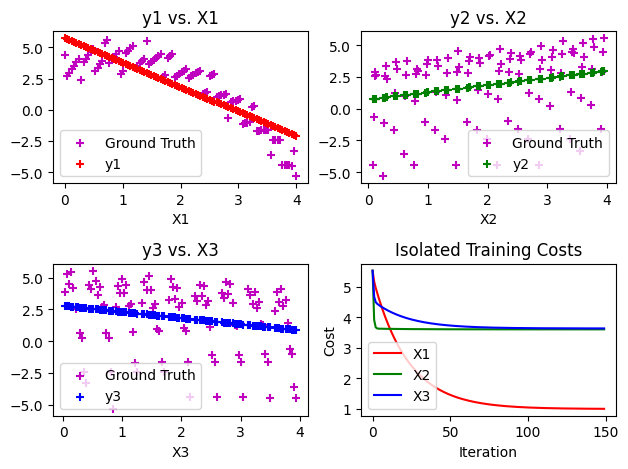

In [85]:
# Sequential Training
X,Y = gen_data(df)

iterations = 150 
alpha = 0.1

fig, ax = plt.subplots(2,2, squeeze=True)

axes: np.ndarray[plt.Axes] = [ax[0,0], ax[0,1], ax[1,0], ax[1,1]]
colors = ['r', 'g', 'b']

iters = range(iterations)
for i in range(1,4):
    
    X_i = np.hstack(( X[:,0].reshape(-1,1), X[:,i].reshape(-1,1) ))
    
    theta_col = np.zeros((2,1))
    theta_col, cost_history = grad_desc(X_i, Y, theta_col, alpha, iterations)
    
    pred = print_model(X_i, Y, theta_col, f"y{i}")
    pred = X_i.dot(theta_col)
    
    axes[i-1].scatter(X[:,i], Y, label=f"Ground Truth", color='m', marker='+')
    axes[i-1].scatter(X[:,i], pred, label=f"y{i}", color=colors[i-1], marker='+')
    axes[i-1].legend()
    axes[i-1].set_xlabel(f"X{i}")
    # axes[i-1].set_ylabel(f"y{i}")
    axes[i-1].set_title(f"y{i} vs. X{i}")
    
    axes[3].plot(iters, cost_history, label=f"X{i}", color=colors[i-1])
#    plt.plot(iters, cost_history, label=f"X{i}")
    
    #print(f"cost for X{i} = {cost}")

#gen_subplots(plots)
plt.title("Isolated Training Costs")
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.legend()

print('\n')
#print_model(X, Y, theta)
plt.tight_layout()

plt.show()


# Problem 1
## Model Results
- The models found by this technique were:
    - y1 = -1.96*X1 + 5.725
    - y2 = 0.564*X2 + 0.72
    - y3 = -0.486*X3 + 2.784
## Cost Analysis
- The lowest cost for explaining the output was X1, whose cost was only 0.99 compared to and 3.63 for X2 and X3. This means that X1 has the most linear relationship to Y.

## Impact of Learning Rate and Iteration Count
- Different learning rates between 0.01 and 0.1 were explored. At alpha=0.01, the gradient descent algorithm had too little an effect on the theta values to adequately train the model. The final cost value for X1's model jumps to 3.2 compared to the cost of 0.99 with alpha = 0.1
    - At alpha = 0.1, the final cost is lower across all three regressions, as the gradient of the cost function has more of an impact on the theta values used for the next iteration

- With each iteration, the model is refined more and more. Thus, like with the learning rate, increasing the number of iterations also improves the performance of the models. However, past 150 iterations the improvement becomes very very minimal for X1, and this point of diminishing return is reached for X2 and X3 around 5 and 50 iterations respectively.
    - These numbers were taken from experimentation where the learning rate was fixed at 0.1 The number of iterations required to achieve a certain loss is dependent on the learning rate, as a model that learns more slowly will require more iterations to imrprove itself.
    - The point of diminishing returns was recorded when the impact of adding 50 more iterations resulted in a decrease in cost less than 0.01
    

Model:
    y = -0.203*X3 + 0.603*X2 + -1.944*X1 + 4.89
    cost = 0.748



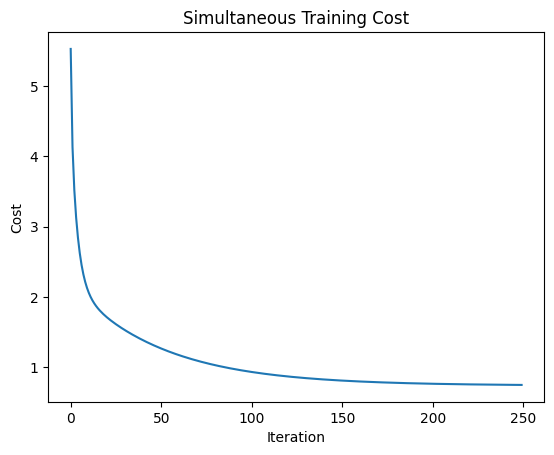

In [86]:
#Simultaneous Descent
theta = np.zeros((X.shape[1], 1))

# 300 iters vs. 1000 iters only has a difference of .004 in cosst
iterations = 250
# Model still converges at max alpha
alpha = 0.1

theta, cost_history = grad_desc(X, Y, theta, alpha, iterations)

plt.plot(range(iterations), cost_history)
plt.title("Simultaneous Training Cost")
plt.xlabel("Iteration")
plt.ylabel("Cost")

print_model(X, Y, theta, 'y')
print('')

In [87]:
X_pred = np.array([
#   X0,1,2,3
    [1,1,1,1],
    [1,2,0,4],
    [1,3,2,1],
    ])
X_pred.dot(theta)

array([[3.34542262],
       [0.18869109],
       [0.06048419]])

# Problem 2
## Model Results
- The model found using this method was ` y = -0.228*X3 + 0.575*X2 -1.967*X1 + 5.057`
    - Its final cost value was 0.742
## Impact of Learning Rate and Iteration Count
- Just like in the previous problem, increasing the learning rate will lead to a better fitting model, and it will also require fewer iterations to reach that best fitting model.
    - In this case, 0.1 was found to be the best value for the learning rate.
    - If the learning rate were to be increased past a certain point, the 'ping-pong' effect would cause the gradient descent algorithm to launch the cost towards infinity with each iteration. This is why it is important to find the highest useable alpha value before this skyrocketing occurs
- Once again increasing the number of iterations leads to a better fitting model, but only up to a certain point of diminishing returns. 
    - In this case, that point of diminishing returns was found to be around 250 iterations using the same criteria used for problem 1.
## Predictions
- The model was able to make the following predictions by multiplying the X values by their corresponding theta values.
    - Y(1,1,1) = 3.437
    - Y(2,0,4) = 0.211
    - Y(3,2,1) = 0.077